# SUPERMARKET SALES EXPLORATORY DATA ANALYSIS(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os
import folium
import missingno as msno

In [2]:
dataset_url='https://www.kaggle.com/aungpyaeap/supermarket-sales'

In [3]:
od.download(dataset_url)

Skipping, found downloaded files in ".\supermarket-sales" (use force=True to force download)


In [4]:
os.listdir(".\supermarket-sales")

['.ipynb_checkpoints']

In [5]:
df= pd.read_csv("supermarket_sales - Sheet1.csv")

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.shape

(1000, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [10]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

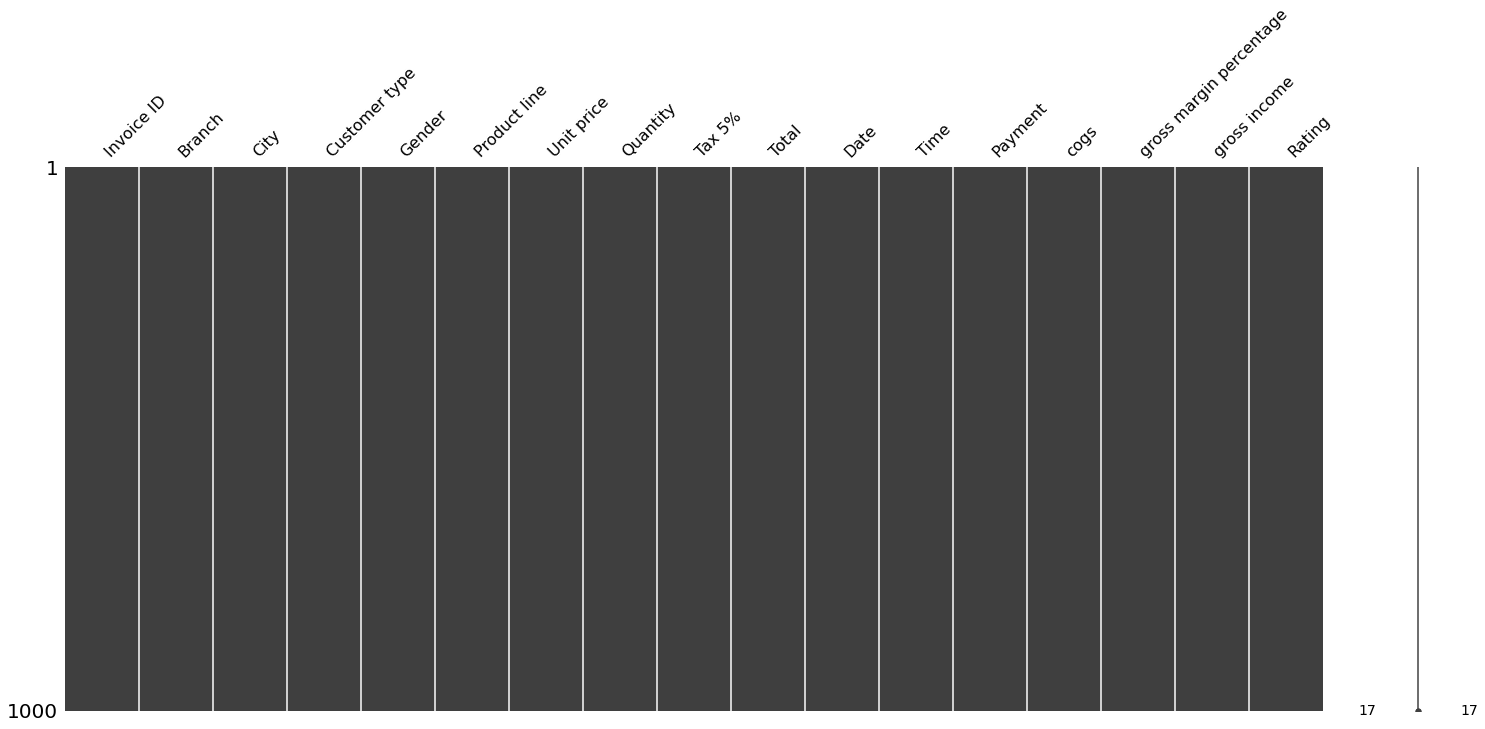

In [12]:
#Visualize the nan values in each columns
msno.matrix(df);

Let's convert the date and time columns into date/time dtypes

In [44]:
# Convert date columns into date time 
df.Date= pd.to_datetime(df.Date)

#Add a month,day and weekday columns
df["month"]= df.Date.dt.month
df["weekday"]= df.Date.dt.day_name()
df["day"]= df.Date.dt.day

#Add a hour and minute columns
df["hour"]= df.Time.str[0:2]
df["minute"]= df.Time.str[3:5]

#Make it int values
df["hour"]= pd.to_numeric(df["hour"])
df["minute"]= pd.to_numeric(df["minute"])

In [45]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
month                               int64
weekday                            object
day                                 int64
hour                                int64
minute                              int64
dtype: object

In [15]:
df.describe().style.background_gradient(cmap= "PuBu")

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,month,day,hour,minute
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.587380,4.761905,15.379369,6.972700,1.993000,15.256000,14.910000,30.098000
std,26.494628,2.923431,11.708825,245.885335,234.176510,0.000000,11.708825,1.718580,0.835254,8.693563,3.186857,16.880680
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000,1.000000,1.000000,10.000000,0.000000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761905,5.924875,5.500000,1.000000,8.000000,12.000000,16.000000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,4.761905,12.088000,7.000000,2.000000,15.000000,15.000000,30.000000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,4.761905,22.445250,8.500000,3.000000,23.000000,18.000000,44.000000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000,3.000000,31.000000,20.000000,59.000000


EXPLORATORY ANALYSIS

In [16]:
#Matplotlib config
sns.set_style("darkgrid")

matplotlib.rcParams["figure.figsize"]= (12, 9)
matplotlib.rcParams["font.size"]= 14
matplotlib.rcParams["figure.facecolor"]= "#00000000"

CITY

In [17]:
df.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [46]:
cities= pd.DataFrame({"city": ['Yangon', 'Naypyitaw', 'Mandalay'],
                     "Latitude": [16.8409,19.7633,21.9588],
                     "Longitude": [96.1735, 96.0785, 96.0891]})
market_map= folium.Map(location= [21.9162, 95.9560], zoom_start= 5, tiles= "CartoDB Positron", control_scale= True)
plt.figure(figsize= (800, 600));
for i, j in cities.iterrows():
    folium.Marker(location= [j.loc["Latitude"], j.loc["Longitude"]], popup= j.loc["city"], tooltip= "click",
                  icon= folium.Icon(icon= "glyphicon-shopping-cart", prefix= "glyphicon")).add_to(market_map)
market_map

<Figure size 80000x60000 with 0 Axes>

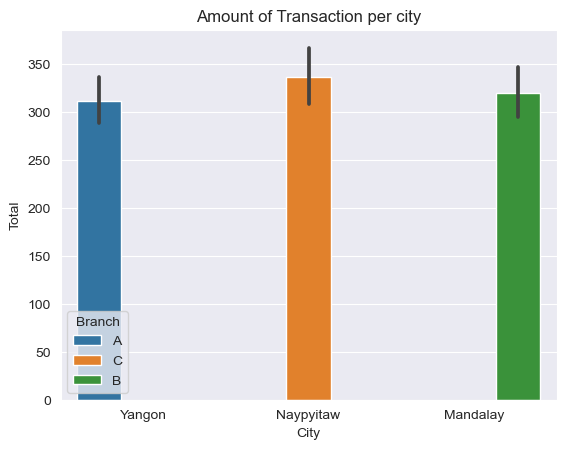

In [47]:
plt.title("Amount of Transaction per city")
sns.barplot(data= df,
             x= "City",
             y= "Total",
             hue= "Branch");

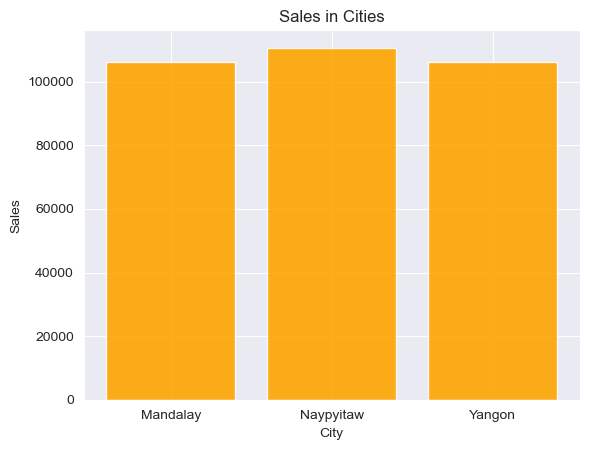

In [48]:
sale= df.groupby("City").sum()["Total"] #Y
city= [city for city, df in df.groupby("City")] #X

plt.bar(city, sale, color= "Orange", alpha= 0.9);
plt.title("Sales in Cities");
plt.xlabel("City");
plt.ylabel("Sales");

# Month

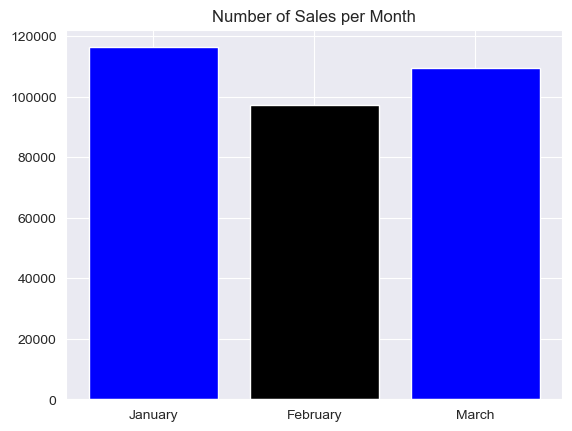

In [49]:
sales= df.groupby("month").sum()["Total"]
month= ["January", "February", "March"]
c= ["b", "k", "b"]
plt.bar(month, sales, color= c);
plt.title('Number of Sales per Month');

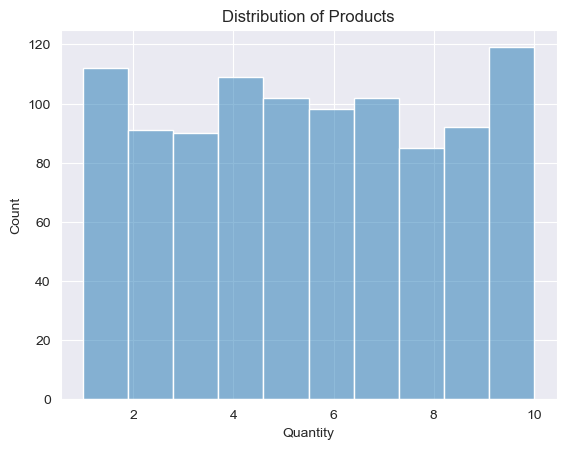

In [50]:
plt.title('Distribution of Products')
sns.histplot(df.Quantity, alpha= 0.5, bins= 10);

# Payment

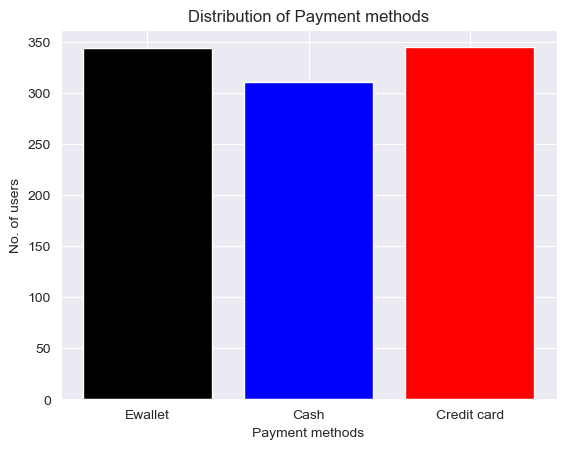

In [51]:
method= df.groupby("Payment").count()["Total"]
payment= ['Ewallet', 'Cash', 'Credit card']
c= ["k", "b", "r"]
#PLot
plt.title("Distribution of Payment methods");
plt.bar(payment, method, color= c);
plt.xlabel("Payment methods");
plt.ylabel("No. of users");

# Rating

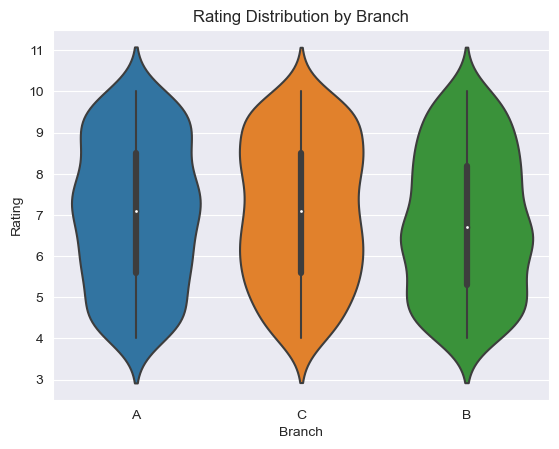

In [52]:
plt.title('Rating Distribution by Branch')
sns.violinplot(data= df, x= "Branch",y=  "Rating");

Observation:

Branch A has received the most positive rating due to the tapered shape toward the middle between the values 6 to 9. Branch B has the most negative rating due to the tapered shape between the values 4 to 6. Branch C has an almost equal positive and negative ratings between the value 4 to 6 and 8 to 10

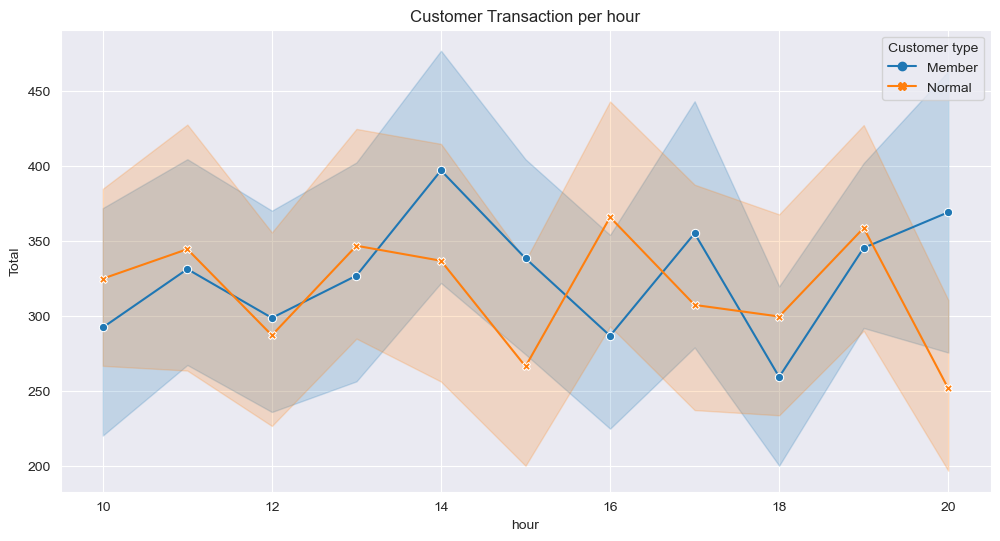

In [53]:
plt.figure(figsize=(12,6))
plt.title("Customer Transaction per hour")
sns.lineplot(data= df, x= "hour", y= "Total", hue= "Customer type", markers =True, style= "Customer type", dashes= False);

Observation: The Normal customers and the members like to shop around noon but members have the highest number of transactions at 2 pm. Around 4 pm and 9 pm, the normal customers shop the most.

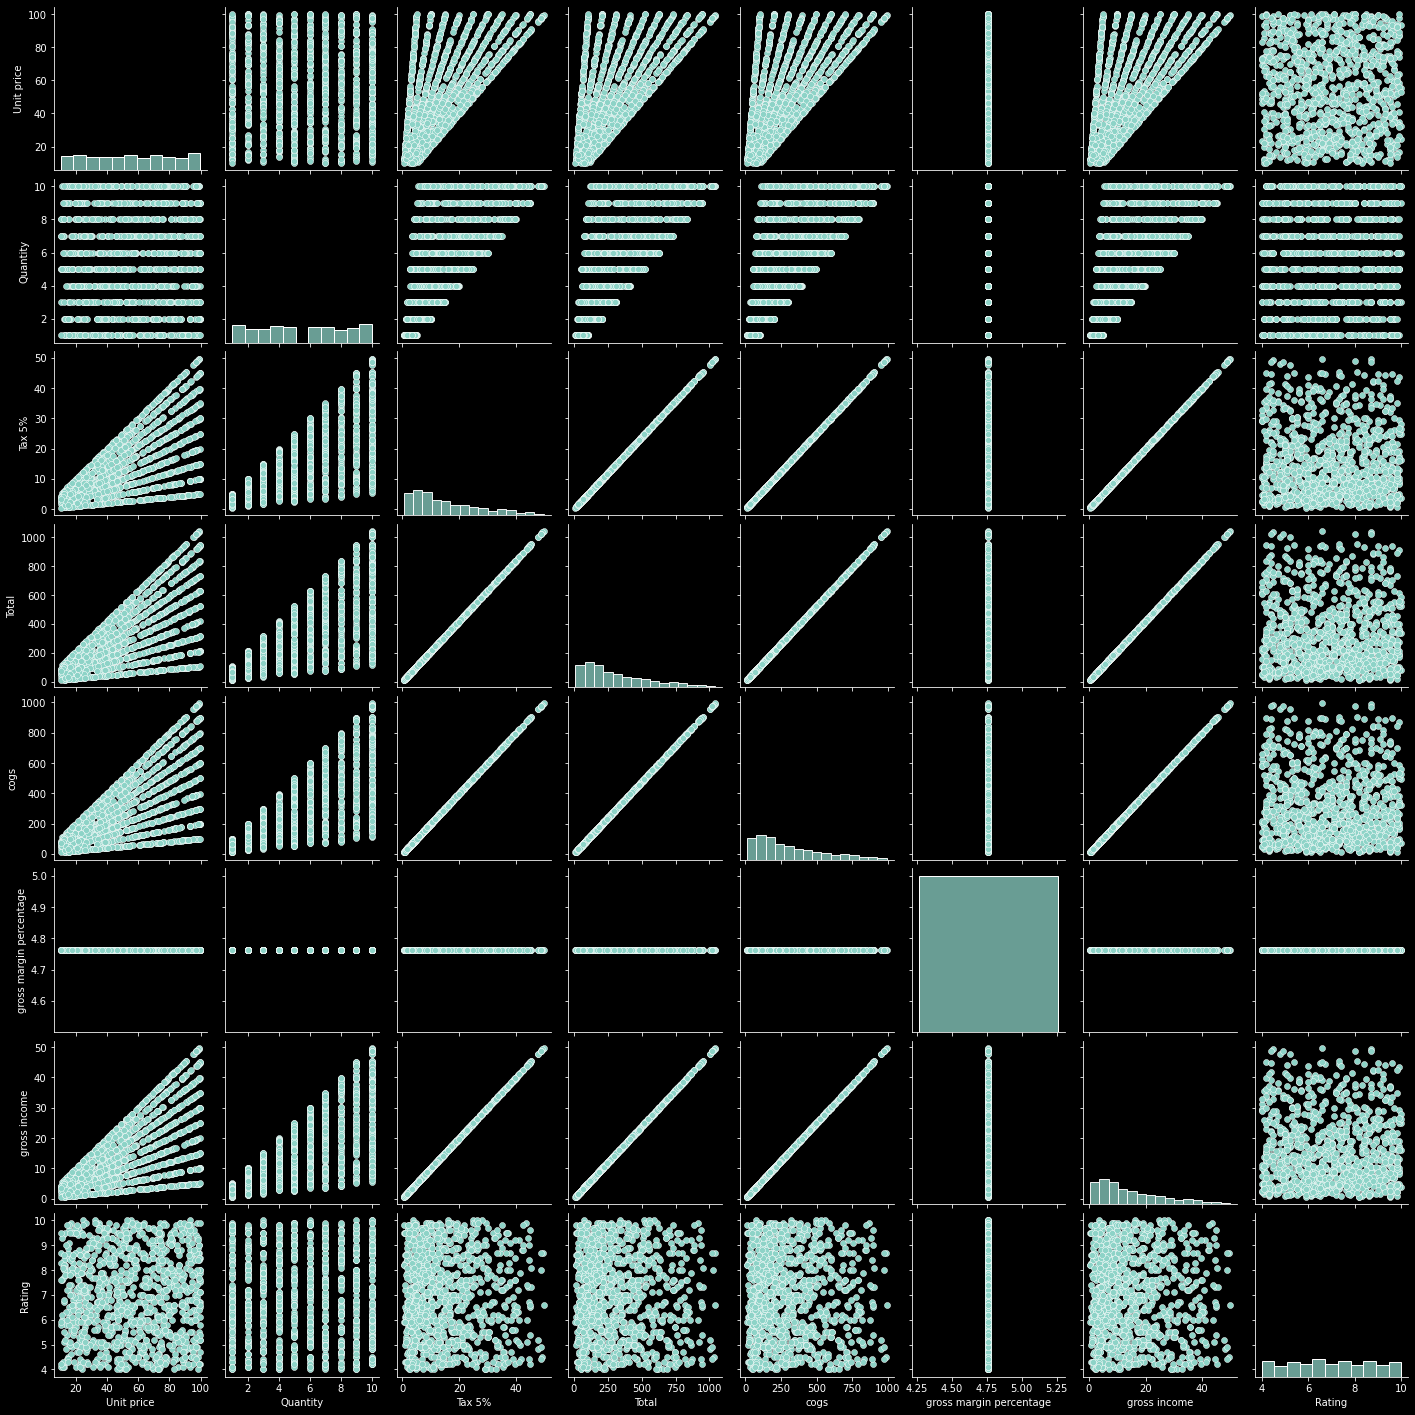

In [12]:
plt.style.use(["dark_background"])
sns.pairplot(df);

# Correlation

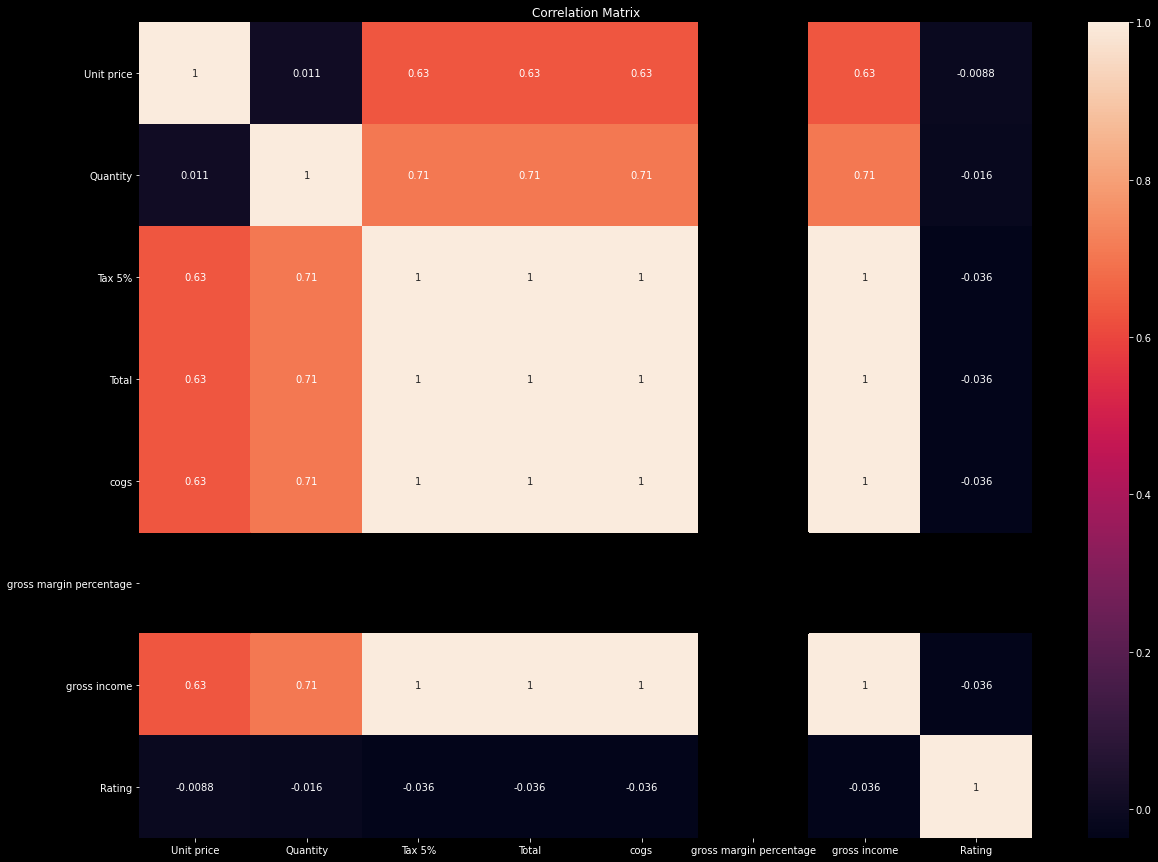

In [13]:
#Create a correlation matrix
corr= df.corr()
#Plot
plt.rcParams["figure.figsize"]= (20,15)
plt.title("Correlation Matrix")
sns.heatmap(corr, annot= True);

Observation:

-The black bars represent the null values (gross margin percentage vs gross margin percentage) -The purple represents almost no correlation between the columns

-The orange block represents a high correlation between values. So taxes, Total, and cogs are highly correlated to quantity and unit price -The pale block represents the perfect correlation between values of the same columns.

## QUESTIONS
What was the total number of sales? What branch has the highest number of sales? What type of product is sold the most?

What gender buy the most product? What gender buy more items in each category? what is the category?

How many people buy more than the average price in each category? Are they a member of the supermarket?

How many female members buy more than the average price in Food and beverages category?

What is the favorite method of payment of the members? of the normal customers?

What time should we display an advertisement to maximize the revenue?

**Q1: What was the total number of sales? What branch has the highest number of sales?**

In [22]:
total_sale= df["Total"].sum()
print("The total sale is: {:.2f}$".format(total_sale))

The total sale is: 322966.75$


In [23]:
sale_branch= df.groupby("Branch").sum()["Total"]
print("Branch C has highest number of sales: {}$". format(max(sale_branch)))

Branch C has highest number of sales: 110568.70649999994$


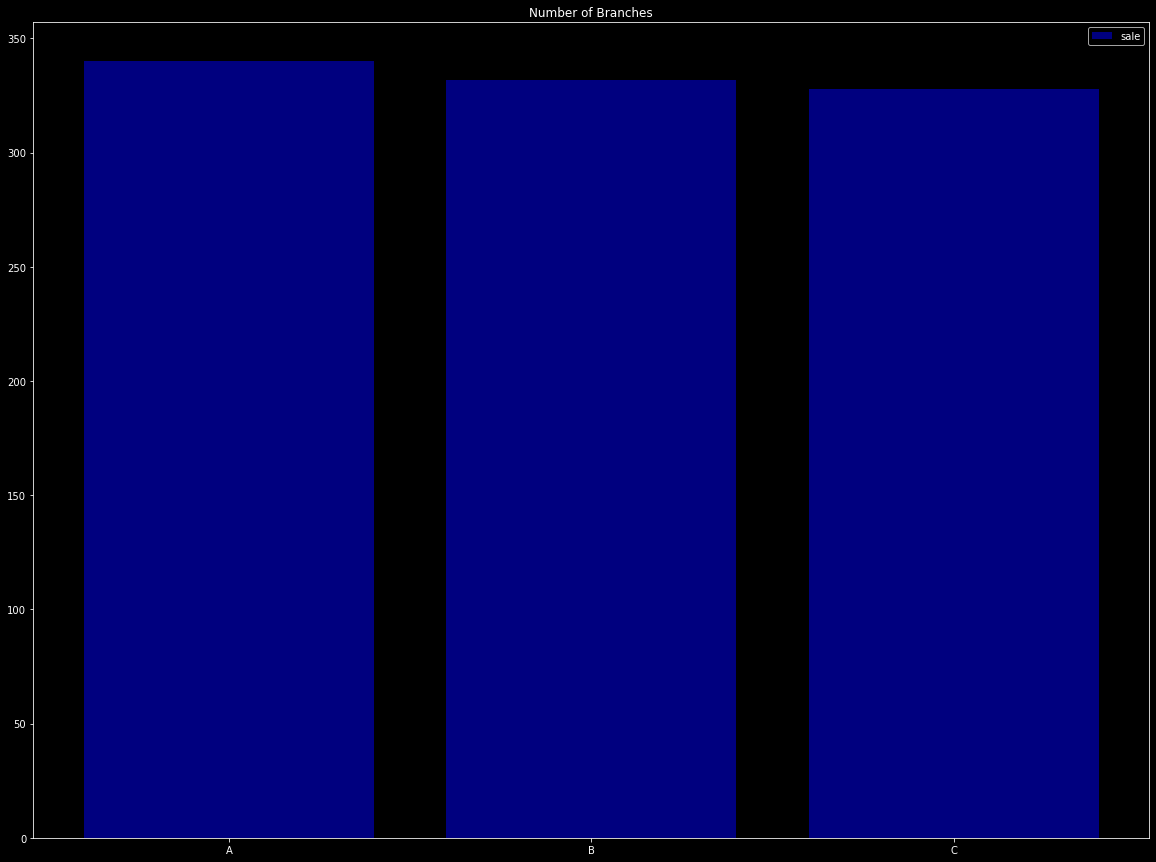

In [24]:
plt.bar(list(df["Branch"].value_counts().keys()), list(df["Branch"].value_counts()), alpha= 0.5, color= "blue");
plt.title("Number of Branches");
plt.legend(["sale"]);

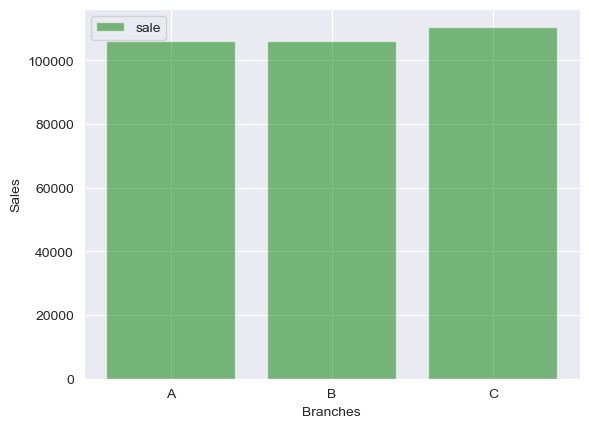

In [25]:
#Plot style
plt.style.use('default')
sns.set_style('darkgrid')

#Paramter for the x-axis
branches = [branch for branch, df in df.groupby('Branch')]
#Plot the graph

plt.bar(branches,sale_branch,alpha=0.5,color='g')
plt.xlabel('Branches')
plt.ylabel('Sales')
plt.legend(['sale'])
plt.show()

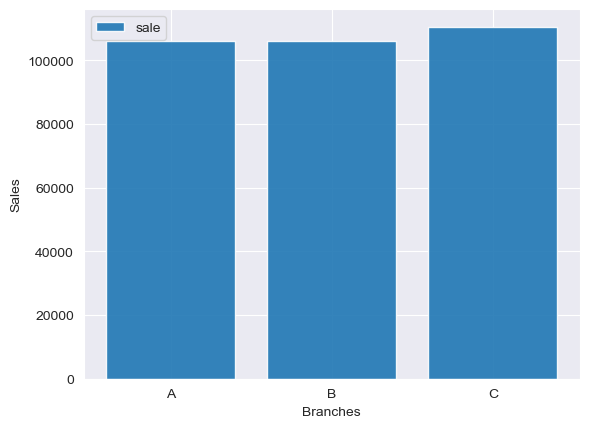

In [26]:
plt.style.use("default")
sns.set_style("darkgrid")
branches= [branch for branch, df in df.groupby("Branch")]
plt.xlabel('Branches')
plt.ylabel('Sales')
plt.bar(branches, sale_branch, alpha= 0.9);
plt.legend(['sale']);

**Q2:What type of product is sold the most?**

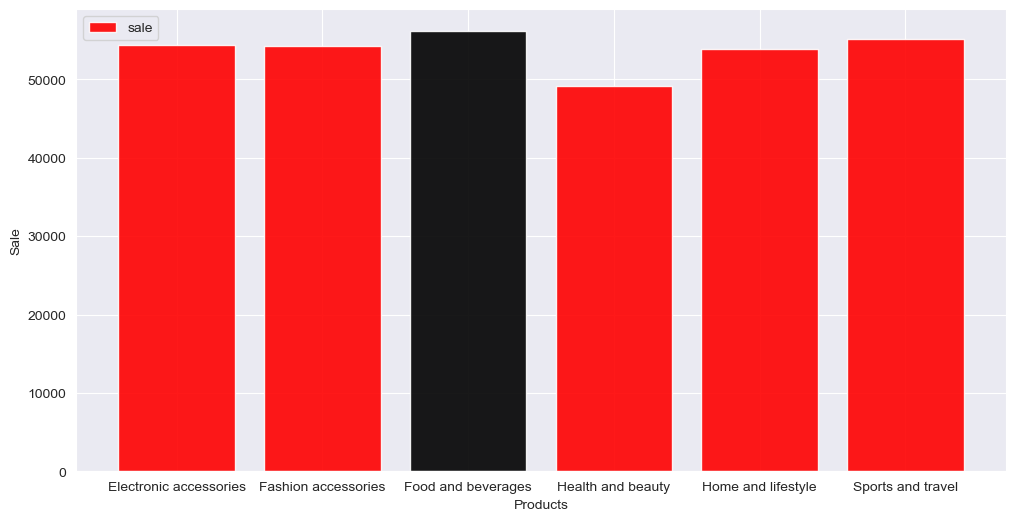

In [27]:
sale_product = df.groupby("Product line").sum()["Total"]
products= [product for product, df in df.groupby("Product line")]
c=['r','r','k','r','r','r']
plt.figure(figsize= (12,6))
#plt.xticks(products, rotation='vertical')
plt.bar(products, sale_product, alpha= 0.9, color= c)
plt.xlabel("Products");
plt.ylabel("Sale")
plt.legend(["sale"], loc= "upper left")
plt.show()

**Q3:What gender buy the most product? What gender buy more items in each category? what is the category?**

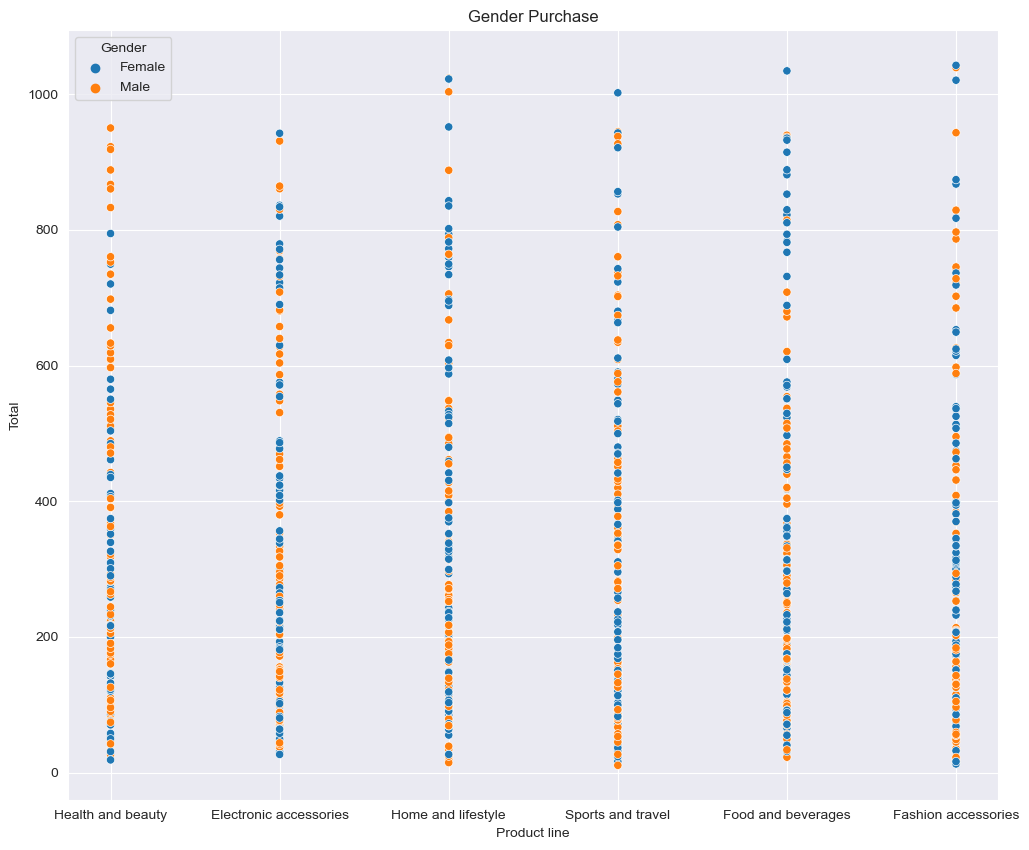

In [28]:
plt.figure(figsize=(12,10))
plt.title('Gender Purchase')
sns.scatterplot(data= df, x= "Product line", y= "Total", hue= "Gender");

In [29]:
gender_market= df[["Gender","Total","Product line","Customer type"]].sort_values("Total", ascending= False)

In [30]:
gender_market["male"]= gender_market["Gender"][gender_market["Gender"]== "Male"]
gender_market["female"]= gender_market["Gender"][gender_market.Gender.str.contains("Female")]
product_gender= gender_market.groupby("Product line").count()
product_gender

,Gender,Total,Customer type,male,female
Product line,,,,,
Electronic accessories,170,170,170,86,84
Fashion accessories,178,178,178,82,96
Food and beverages,174,174,174,84,90
Health and beauty,152,152,152,88,64
Home and lifestyle,160,160,160,81,79
Sports and travel,166,166,166,78,88


In [31]:
print('Men buy more product in 3 categories: \nElectronic accessories: 86 men\nHealth and beauty: 88 men\nHome and lifestyle: 81 men\n')
print('Women buy more product in 3 categories: \nFashion accessories: 96 women\nFood and beverages: 90 women\nsports and travel: 88 women ')

Men buy more product in 3 categories: 
Electronic accessories: 86 men
Health and beauty: 88 men
Home and lifestyle: 81 men

Women buy more product in 3 categories: 
Fashion accessories: 96 women
Food and beverages: 90 women
sports and travel: 88 women 


In [32]:
list(product_gender["male"])

[86, 82, 84, 88, 81, 78]

In [33]:
list(product_gender["female"])

[84, 96, 90, 64, 79, 88]

In [34]:
list(product_gender["male"].keys())

['Electronic accessories',
 'Fashion accessories',
 'Food and beverages',
 'Health and beauty',
 'Home and lifestyle',
 'Sports and travel']

In [35]:
list(product_gender["female"].keys())

['Electronic accessories',
 'Fashion accessories',
 'Food and beverages',
 'Health and beauty',
 'Home and lifestyle',
 'Sports and travel']

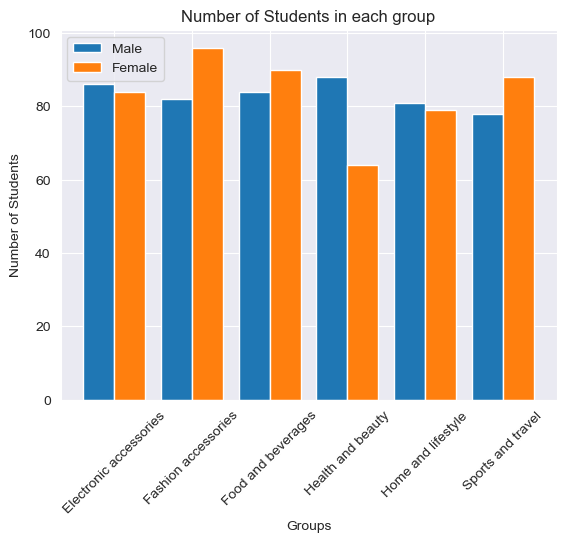

In [36]:
X = ['Electronic accessories',
 'Fashion accessories',
 'Food and beverages',
 'Health and beauty',
 'Home and lifestyle',
 'Sports and travel']
male = [86, 82, 84, 88, 81, 78]
female = [84, 96, 90, 64, 79, 88]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female')
  
plt.xticks(X_axis, X, rotation= 45)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

**Q4: How many people buy more than the average price in each category? Are they a member of the supermarket?**

In [37]:
mean_sale= gender_market["Total"].mean()
product_line= gender_market["Product line"].unique()
print("The average sale of product is {:.3f}$".format(mean_sale))

The average sale of product is 322.967$


In [38]:
people= []
for product in product_line:
    p= gender_market[(gender_market["Total"]>322.967) & (gender_market["Product line"]== product)].count()["Total"]
    people.append(p)
num_people= np.sum(people)

In [39]:
#Result
print("The number of people who buy more average price by product line are:\n")
for pro,p in zip(product_line, people):
    print(f"{pro}: {p} people")
print(f'\nFor a total of {num_people} people')

The number of people who buy more average price by product line are:

Fashion accessories: 69 people
Food and beverages: 67 people
Home and lifestyle: 66 people
Sports and travel: 75 people
Health and beauty: 60 people
Electronic accessories: 67 people

For a total of 404 people


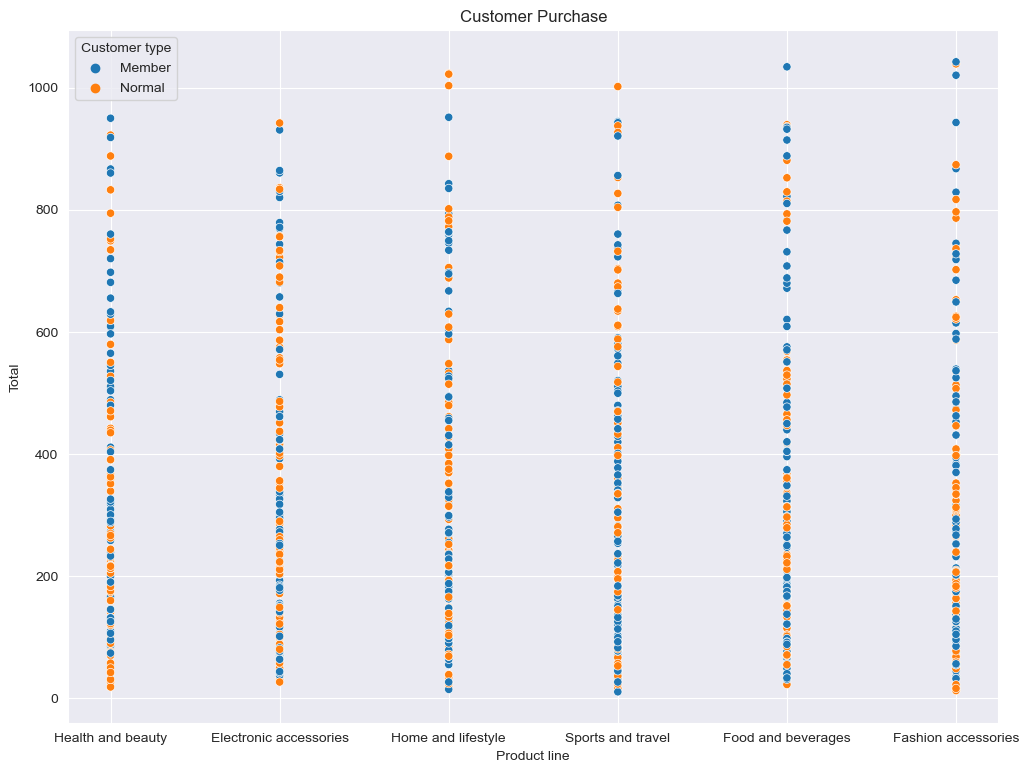

In [40]:
plt.figure(figsize=(12,9))
plt.title('Customer Purchase')
sns.scatterplot(x='Product line',y='Total',hue='Customer type',data=df);

In [58]:
member= gender_market[(gender_market["Total"]>322.96) & (gender_market["Customer type"]== "Member")].count()["Total"]
member_percentage= (member/num_people)*100
print("{:.2f}% that buy more than the average price are members".format(member_percentage))

50.50% that buy more than the average price are members


**Q5: How many female members buy more than the average price in Food and beverages category?**

In [62]:
gender_market[(gender_market["Total"]>322.96) & (gender_market["Gender"] == "Female") & (gender_market["Product line"]== "Food and beverages") & (gender_market["Customer type"] == "Member")].count()["Total"]

23

**Q6: What is the favorite method of payment of the members? of the normal customers?**

In [64]:
member= df[df["Customer type"]== "Member"]
ncustom= df[df["Customer type"]== "Normal"]

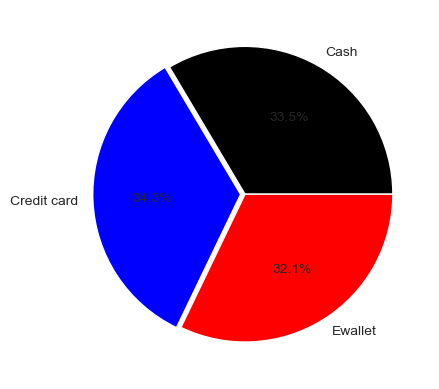

In [74]:
method= member.groupby("Payment").count()["Total"]
payment= ['Cash', 'Credit card', 'Ewallet']
c= ['k','b','r']
plt.pie(method, labels= payment, colors= c, explode= [0,0.03,0], autopct= "%1.1f%%")
plt.show()

In [76]:
print('The favorite method of payment for the member is credit card and cash')

The favorite method of payment for the member is credit card and cash


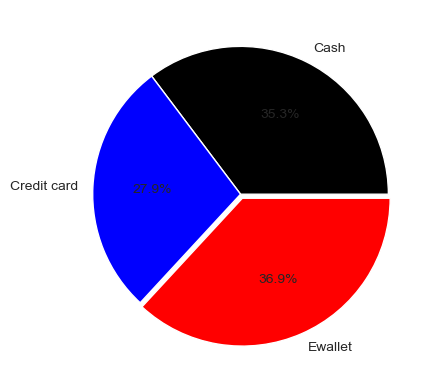

In [78]:
method= ncustom.groupby("Payment").count()["Total"]
payment= ['Cash', 'Credit card', 'Ewallet']
c= ['k','b','r']
plt.pie(method, labels= payment, colors= c, explode= [0,0,0.03], autopct= "%1.1f%%")
plt.show()

In [79]:
print('The favorite method of payment for the member is Ewallet following by Cash')

The favorite method of payment for the member is Ewallet following by Cash


**Q7: What time should we display an advertisement to maximize the revenue?**

In [80]:
#Parameter for plotting
sale= df.groupby("hour").sum()["Total"]
hours= [hour for hour, df in df.groupby("hour")]

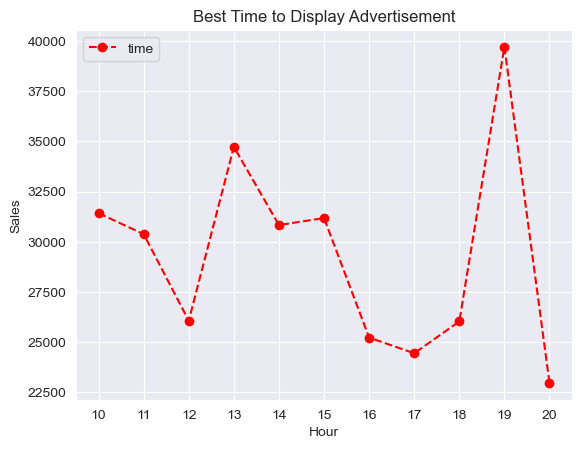

In [85]:
plt.plot(hours,sale,"o--r")
plt.xlabel('Hour')
plt.xticks(hours)
plt.ylabel('Sales')
plt.title('Best Time to Display Advertisement')
plt.legend(['time'])
plt.show()

In [86]:
print('We should display advertisement to the customer before 13h and 19h')

We should display advertisement to the customer before 13h and 19h
